In [ ]:
import numpy as np                   
import pandas as pd                   
import matplotlib.pyplot as plt       
import seaborn as sns      

In [ ]:
import io
from google.colab import files
uploaded = files.upload()
dataframe = pd.read_csv(io.StringIO(uploaded['advertising.csv'].decode('utf-8')))

Saving advertising.csv to advertising (2).csv


In [ ]:
dataframe

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,impression
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27-03-2016 00:53,0,44
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04-04-2016 01:39,0,17
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13-03-2016 20:35,0,26
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10-01-2016 02:31,0,18
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03-06-2016 03:36,0,37
...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,11-02-2016 21:49,1,19
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,22-04-2016 02:07,1,10
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,01-02-2016 17:24,1,40
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,24-03-2016 02:35,0,37


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
 10  impression                1000 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 86.1+ KB


In [ ]:
dataframe.duplicated().sum()

0

In [ ]:
numeric_columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage' ]

In [ ]:
categorical_columns = [ 'Ad Topic Line', 'City', 'Male', 'Country', 'Clicked on Ad' ]

**what age group does the dataset majorly consist of?**

<ipython-input-40-3e9290afe183>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['Age'], bins = 20, kde=True, hist_kws=dict(edgecolor="k", linewidth=1))


<Axes: xlabel='Age', ylabel='Density'>

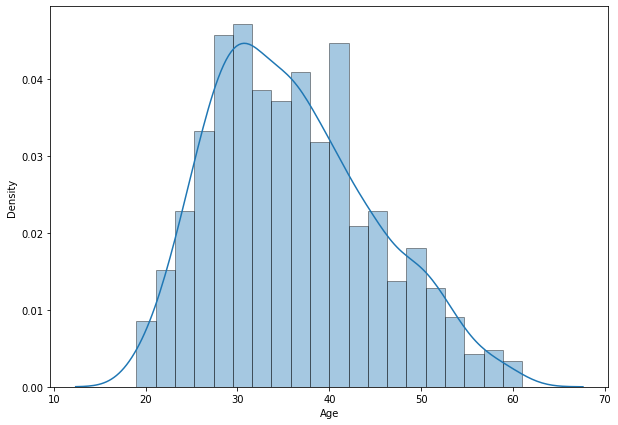

In [ ]:
plt.figure(figsize=(10,7))
sns.distplot(dataframe['Age'], bins = 20, kde=True, hist_kws=dict(edgecolor="k", linewidth=1))

Here, we can see that most of the internet users are having age in the range of 26 to 42 years.

In [ ]:
print('Age of the oldest person:', dataframe['Age'].max(), 'Years')
print('Age of the youngest person:', dataframe['Age'].min(), 'Years')
print('Average age in dataset:', dataframe['Age'].mean(), 'Years')

Age of the oldest person: 61 Years
Age of the youngest person: 19 Years
Average age in dataset: 36.009 Years


**What is the income distribution in different age groups?**

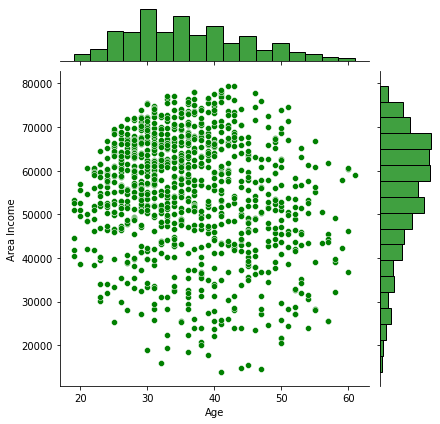

In [ ]:
sns.jointplot(x='Age', y='Area Income', color= "green", data= dataframe)

Here, we can see that mostly teenagers are higher earners with age group of 20-40 earning 50k-70k.

**Which age group is spending maximum time on the internet?**

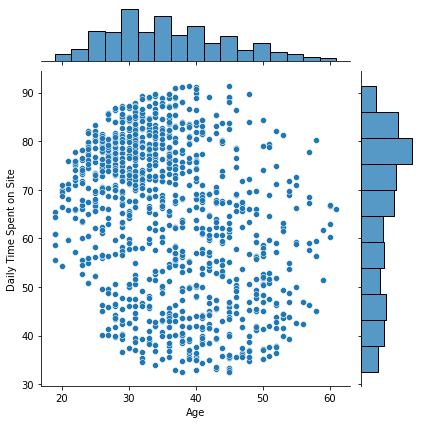

In [ ]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data= dataframe)

From the above plot its evident that the age group of 25-40 is most active on the internet.

**Which gender has clicked more on online ads?**



In [ ]:
dataframe.groupby(['Male','Clicked on Ad'])['Clicked on Ad'].count().unstack()

Clicked on Ad,0,1
Male,,
0,250,269
1,250,231


Based on above data we can see that a greater number of females have clicked on ads compared to male.

**Maximum number of internet users belong to which country in the given dataset?**

In [ ]:
pd.crosstab(index=dataframe['Country'],columns='count').sort_values(['count'], ascending=False)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
...,...
Montserrat,1
Mozambique,1
Romania,1


Based on the above data frame we can observe that maximum number of users are from France and Czech.

**Did we match our baseline that we set?**

In [ ]:
dataframe.groupby('Clicked on Ad')['Clicked on Ad', 'Daily Time Spent on Site', 'Age', 'Area Income', 
                            'Daily Internet Usage'].mean()

<ipython-input-46-6438fe9c2619>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataframe.groupby('Clicked on Ad')['Clicked on Ad', 'Daily Time Spent on Site', 'Age', 'Area Income',


,Clicked on Ad,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Clicked on Ad,,,,,
0,0.0,76.85462,31.684,61385.58642,214.51374
1,1.0,53.14578,40.334,48614.41374,145.48646


**What is the relationship between different features?**

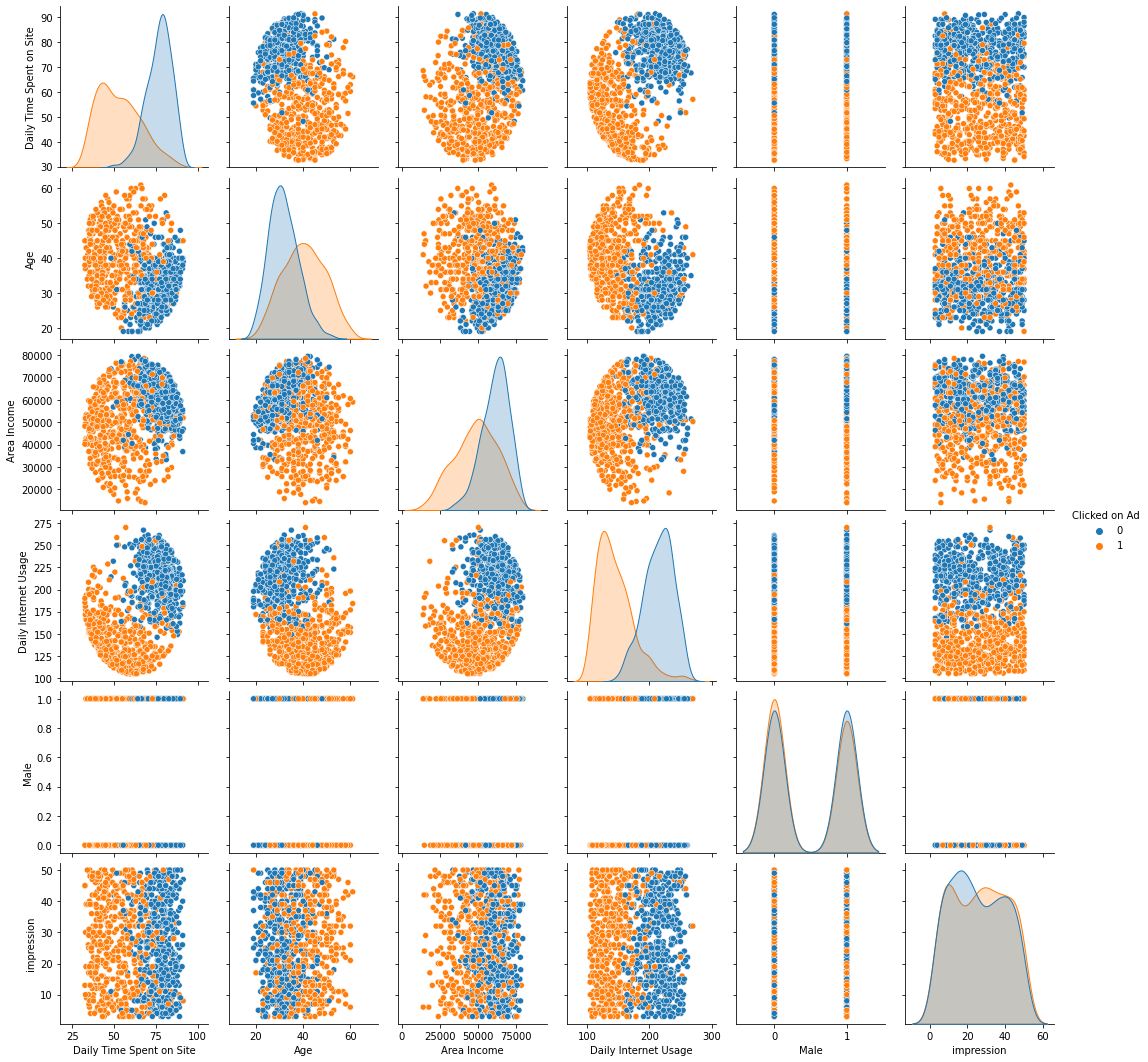

In [ ]:
sns.pairplot(dataframe, hue='Clicked on Ad')

**Calculating CTR**

In [ ]:
total_impressions = dataframe['impression'].sum()

In [ ]:
total_clicks = dataframe['Clicked on Ad'].sum()

In [ ]:
CTR = (total_clicks / total_impressions) * 100

In [ ]:
print("Click-through rate (CTR) is {:.2f}%".format(CTR))

Click-through rate (CTR) is 1.93%


**Data Cleaning**

<Axes: >

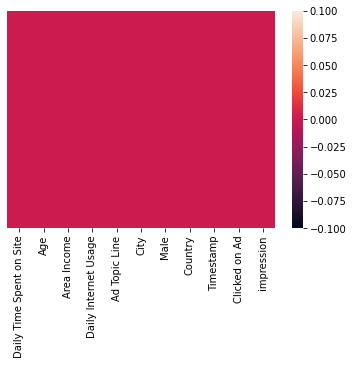

In [ ]:
sns.heatmap(dataframe.isnull(), yticklabels=False)

In [ ]:
dataframe['City Codes']= dataframe['City'].astype('category').cat.codes

In [ ]:
dataframe['Country Codes'] = dataframe['Country'].astype('category').cat.codes

In [ ]:
dataframe[['City Codes','Country Codes']].head(5)

,City Codes,Country Codes
0,961,215
1,903,147
2,111,184
3,939,103
4,805,96


In [ ]:
dataframe['Month'] = dataframe['Timestamp'].apply(lambda x: x.split('-')[1])
dataframe['Hour'] = dataframe['Timestamp'].apply(lambda x: x.split(':')[0].split(' ')[1])

In [ ]:
dataframe[['Month','Hour']].head(5)

,Month,Hour
0,03,00
1,04,01
2,03,20
3,01,02
4,06,03


**Data Model Implementation**

In [ ]:
X = dataframe.drop(labels=['Ad Topic Line','City','Country','Timestamp','Clicked on Ad'], axis=1)

In [ ]:
Y = dataframe['Clicked on Ad']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nav_bayes_model = GaussianNB()

In [ ]:
nav_bayes_model.fit(X_train, Y_train)

GaussianNB()

In [ ]:
nav_bayes_pred = nav_bayes_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
nav_bayes_accuracy = accuracy_score(nav_bayes_pred, Y_test)
print(nav_bayes_accuracy*100)

96.0
